In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def adjust_brightness(image, target_brightness=128, threshold=30):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the average brightness of the image
    avg_brightness = np.mean(gray)
    
    # Calculate the adjustment factor
    beta = target_brightness - avg_brightness
    
    # Adjust the brightness of the image if it's too bright or too dark
    if abs(beta) > threshold:
        new_image = cv2.convertScaleAbs(image, alpha=1.0, beta=beta)
    else:
        new_image = image
    
    return new_image

def crop_barcode(image_path, output_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image from {image_path}")
        return
    
    # Adjust the brightness of the image
    image = adjust_brightness(image)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization to improve contrast
    gray = cv2.equalizeHist(gray)
    
    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (9, 9), 0)
    
    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    # Show the intermediate images
    show_image("Gray Image", gray)
    show_image("Thresholded Image", thresh)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort the contours by area, keeping only the largest one
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    barcode_contour = None
    
    # Loop over the contours to find the one that likely represents the barcode
    for contour in contours:
        # Approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        
        # If the approximated contour has four points, we can assume we have found the barcode
        if len(approx) == 4:
            barcode_contour = approx
            break
    
    if barcode_contour is not None:
        # Get the bounding box of the barcode contour
        x, y, w, h = cv2.boundingRect(barcode_contour)
        
        # Crop the thresholded image to the bounding box
        cropped_image = thresh[y:y+h, x:x+w]
        
        # Save the cropped image
        cv2.imwrite(output_path, cropped_image)
        print(f"Cropped image saved to {output_path}")
        
        # Optionally, show the cropped image
        show_image("Cropped Barcode", cropped_image)
    else:
        print("No barcode detected")



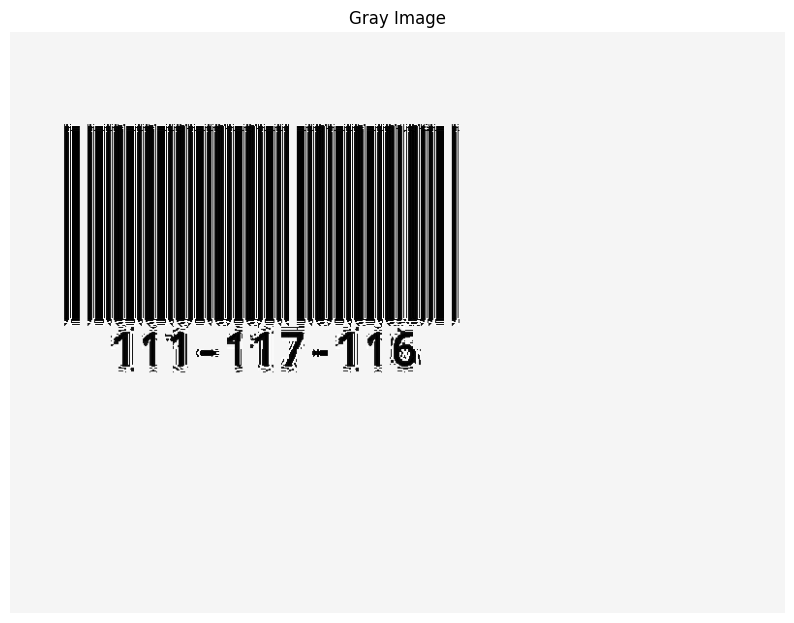

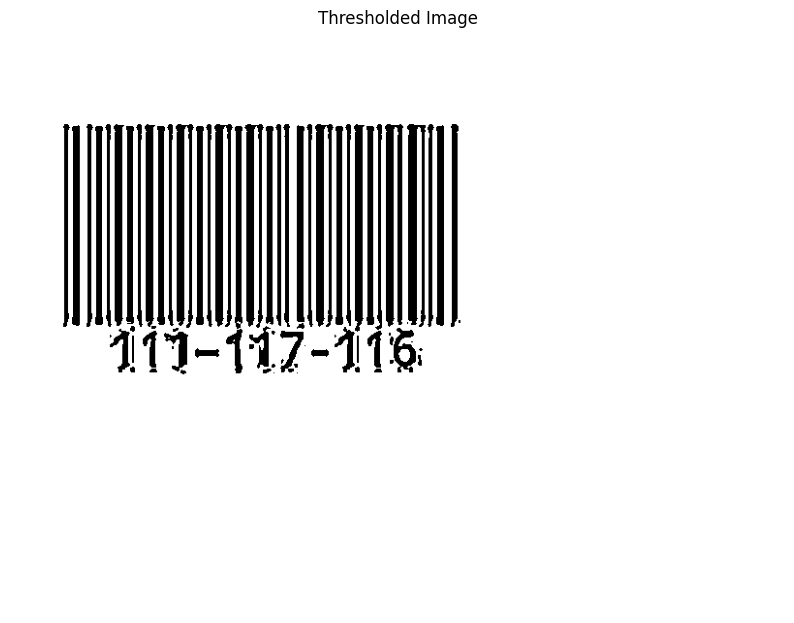

Cropped image saved to cropped_image.jpg


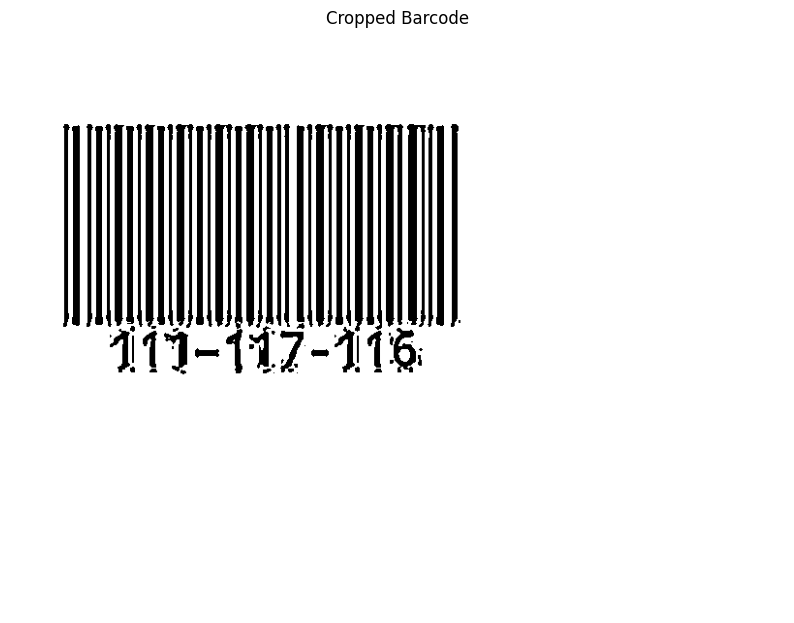

In [12]:
# Example usage
#crop_barcode('C://Uni//Senior 1 Sem1//CV//Project//barcode_vision//Test Case Images//05 - meen taffa el nour!!!.jpg', 'cropped_image.jpg')
crop_barcode('C://Uni//Senior 1 Sem1//CV//Project//barcode_vision//Test Case Images//06 - meen fata7 el nour 333eenaaayy.jpg', 'cropped_image.jpg')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def adjust_brightness(image, target_brightness=128, threshold=30):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the average brightness of the image
    avg_brightness = np.mean(gray)
    
    # Calculate the adjustment factor
    beta = target_brightness - avg_brightness
    
    # Adjust the brightness of the image if it's too bright or too dark
    if abs(beta) > threshold:
        new_image = cv2.convertScaleAbs(image, alpha=1.0, beta=beta)
    else:
        new_image = image
    
    return new_image

def crop_barcode(image_path, output_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image from {image_path}")
        return
    
    # Adjust the brightness of the image
    image = adjust_brightness(image)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization to improve contrast
    gray = cv2.equalizeHist(gray)
    
    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (9, 9), 0)
    
    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    # Show the intermediate images
    show_image("Gray Image", gray)
    show_image("Thresholded Image", thresh)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort the contours by area, keeping only the largest one
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    barcode_contour = None
    
    # Loop over the contours to find the one that likely represents the barcode
    for contour in contours:
        # Approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        
        # If the approximated contour has four points, we can assume we have found the barcode
        if len(approx) == 4:
            barcode_contour = approx
            break
    
    if barcode_contour is not None:
        # Get the bounding box of the barcode contour
        x, y, w, h = cv2.boundingRect(barcode_contour)
        
        # Crop the thresholded image to the bounding box
        cropped_image = thresh[y:y+h, x:x+w]
        
        # Save the cropped image
        cv2.imwrite(output_path, cropped_image)
        print(f"Cropped image saved to {output_path}")
        
        # Optionally, show the cropped image
        show_image("Cropped Barcode", cropped_image)
    else:
        print("No barcode detected")

# Example usage
crop_barcode('C://Uni//Senior 1 Sem1//CV//Project//barcode_vision//Test Case Images//05 - meen taffa el nour!!!.jpg', 'cropped_image.jpg')